# S&P 500 Stock Prices Prediction Project in Python

## 1. Importing libraries and loading the dataset

In [2]:
# Importing and Aliasing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Import from .csv file
df = pd.read_csv('S&P 500 Stock Prices 2017.csv')

df

,symbol,date,open_price,high,low,closing_price,volume
0,AAL,03/01/2017,47.28,47.34,46.135,46.30,6737752
1,AAPL,03/01/2017,115.80,116.33,114.760,116.15,28781865
2,AAP,03/01/2017,170.78,171.36,169.310,170.60,691526
3,ABBV,03/01/2017,62.92,63.03,61.935,62.41,9328198
4,ABC,03/01/2017,78.51,83.10,78.310,82.61,4134229
...,...,...,...,...,...,...,...
126027,XYL,29/12/2017,68.53,68.80,67.920,68.20,1046677
126028,YUM,29/12/2017,82.64,82.71,81.590,81.61,1347613
126029,ZBH,29/12/2017,121.75,121.95,120.620,120.67,1023624
126030,ZION,29/12/2017,51.28,51.55,50.810,50.83,1261916


## 2. Data Understanding

In [3]:
# Basic summary of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126032 entries, 0 to 126031
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   symbol         126032 non-null  object 
 1   date           126032 non-null  object 
 2   open_price     126031 non-null  float64
 3   high           126031 non-null  float64
 4   low            126031 non-null  float64
 5   closing_price  126032 non-null  float64
 6   volume         126032 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 6.7+ MB


In [4]:
# Number of rows and columns

df.shape

(126032, 7)

In [5]:
# Checking first five records

df.head()

,symbol,date,open_price,high,low,closing_price,volume
0,AAL,03/01/2017,47.28,47.34,46.135,46.30,6737752
1,AAPL,03/01/2017,115.80,116.33,114.760,116.15,28781865
2,AAP,03/01/2017,170.78,171.36,169.310,170.60,691526
3,ABBV,03/01/2017,62.92,63.03,61.935,62.41,9328198
4,ABC,03/01/2017,78.51,83.10,78.310,82.61,4134229


In [6]:
# Checking column names

df.columns

Index(['symbol', 'date', 'open_price', 'high', 'low', 'closing_price',
       'volume'],
      dtype='object')

In [7]:
# Checking data types

df.dtypes

symbol            object
date              object
open_price       float64
high             float64
low              float64
closing_price    float64
volume             int64
dtype: object

In [8]:
# Get basic descriptive statistics

df.describe()

,open_price,high,low,closing_price,volume
count,126031.000000,126031.000000,126031.000000,126032.000000,1.260320e+05
mean,98.777123,99.555482,97.981006,98.800312,3.970423e+06
std,123.859409,124.718194,122.962818,123.898500,7.576619e+06
min,3.490000,3.560000,3.410000,3.510000,3.000000e+00
25%,45.410000,45.802500,45.010000,45.420000,1.057686e+06
50%,72.340000,72.880000,71.800000,72.370000,1.975087e+06
75%,115.500000,116.310000,114.640000,115.510000,3.988204e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,3.125568e+08


## 3. Data Pre-Processing and Cleaning

In [9]:
# Creating a copy of the data to use for the project

df = df.copy()

In [10]:
df.dtypes

symbol            object
date              object
open_price       float64
high             float64
low              float64
closing_price    float64
volume             int64
dtype: object

In [ ]:
# Changing the Data Type for the 'date' column to datetime and
# specifying the format that Python needs to use to read the data

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df.dtypes

symbol                   object
date             datetime64[ns]
open_price              float64
high                    float64
low                     float64
closing_price           float64
volume                    int64
dtype: object

In [ ]:
# Capitalize the column names using dictionary

df = df.rename(columns={'symbol':'Symbol',
                        'date':'Date',
                        'open_price':'Open_Price',
                        'high':'High',
                        'low':'Low',
                        'closing_price':'Closing_Price',
                        'volume':'Volume'})

df.columns

Index(['Symbol', 'Date', 'Open_Price', 'High', 'Low', 'Closing_Price',
       'Volume'],
      dtype='object')

In [13]:
# Checking for null values

df.isna().sum()

Symbol           0
Date             0
Open_Price       1
High             1
Low              1
Closing_Price    0
Volume           0
dtype: int64

In [14]:
# Droping the null values

df = df.dropna()
df.isna().sum()

Symbol           0
Date             0
Open_Price       0
High             0
Low              0
Closing_Price    0
Volume           0
dtype: int64

In [15]:
# Checking for duplicates

df.loc[df.duplicated()]

,Symbol,Date,Open_Price,High,Low,Closing_Price,Volume


In [16]:
# Creating month column

df['Month'] = pd.to_datetime(df['Date']).dt.month

df

,Symbol,Date,Open_Price,High,Low,Closing_Price,Volume,Month
0,AAL,2017-01-03,47.28,47.34,46.135,46.30,6737752,1
1,AAPL,2017-01-03,115.80,116.33,114.760,116.15,28781865,1
2,AAP,2017-01-03,170.78,171.36,169.310,170.60,691526,1
3,ABBV,2017-01-03,62.92,63.03,61.935,62.41,9328198,1
4,ABC,2017-01-03,78.51,83.10,78.310,82.61,4134229,1
...,...,...,...,...,...,...,...,...
126027,XYL,2017-12-29,68.53,68.80,67.920,68.20,1046677,12
126028,YUM,2017-12-29,82.64,82.71,81.590,81.61,1347613,12
126029,ZBH,2017-12-29,121.75,121.95,120.620,120.67,1023624,12
126030,ZION,2017-12-29,51.28,51.55,50.810,50.83,1261916,12


## 4. Exploratory Data Analysis (EDA)

Text(0.5, 0, 'Closing Price')

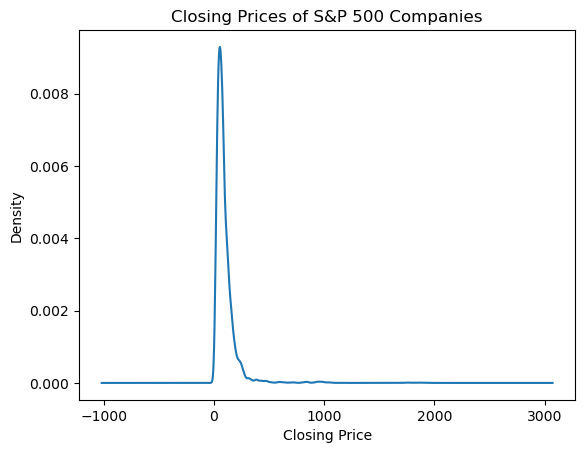

In [30]:
# Ploting the Closing Prices

ax = df['Closing_Price'].plot(kind='kde',
                          title='Closing Prices of S&P 500 Companies')
ax.set_xlabel('Closing Price')

* Creating correlation matrix


In [ ]:
# Printing the column names and data types to pick the columns with numeric values
df.dtypes

Symbol                   object
Date             datetime64[ns]
Open_Price              float64
High                    float64
Low                     float64
Closing_Price           float64
Volume                    int64
Month                     int32
dtype: object

In [19]:
df_corr = df[['Date', 'Open_Price', 'High', 'Low', 'Closing_Price', 'Volume', 'Month']].corr()
df_corr

,Date,Open_Price,High,Low,Closing_Price,Volume,Month
Date,1.000000,0.032590,0.032690,0.032427,0.032400,-0.010222,0.996468
Open_Price,0.032590,1.000000,0.999962,0.999952,0.999920,-0.149307,0.032519
High,0.032690,0.999962,1.000000,0.999941,0.999960,-0.149076,0.032619
Low,0.032427,0.999952,0.999941,1.000000,0.999964,-0.149716,0.032342
Closing_Price,0.032400,0.999920,0.999960,0.999964,1.000000,-0.149412,0.032319
Volume,-0.010222,-0.149307,-0.149076,-0.149716,-0.149412,1.000000,-0.010279
Month,0.996468,0.032519,0.032619,0.032342,0.032319,-0.010279,1.000000


* Creating heatmap


<Axes: >

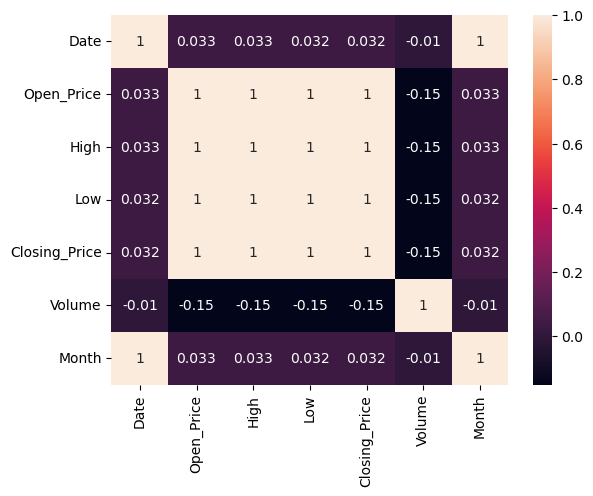

In [ ]:
# Using the annotation to show the values on the blocks
sns.heatmap(df_corr, annot=True)

* Creating Pairplot

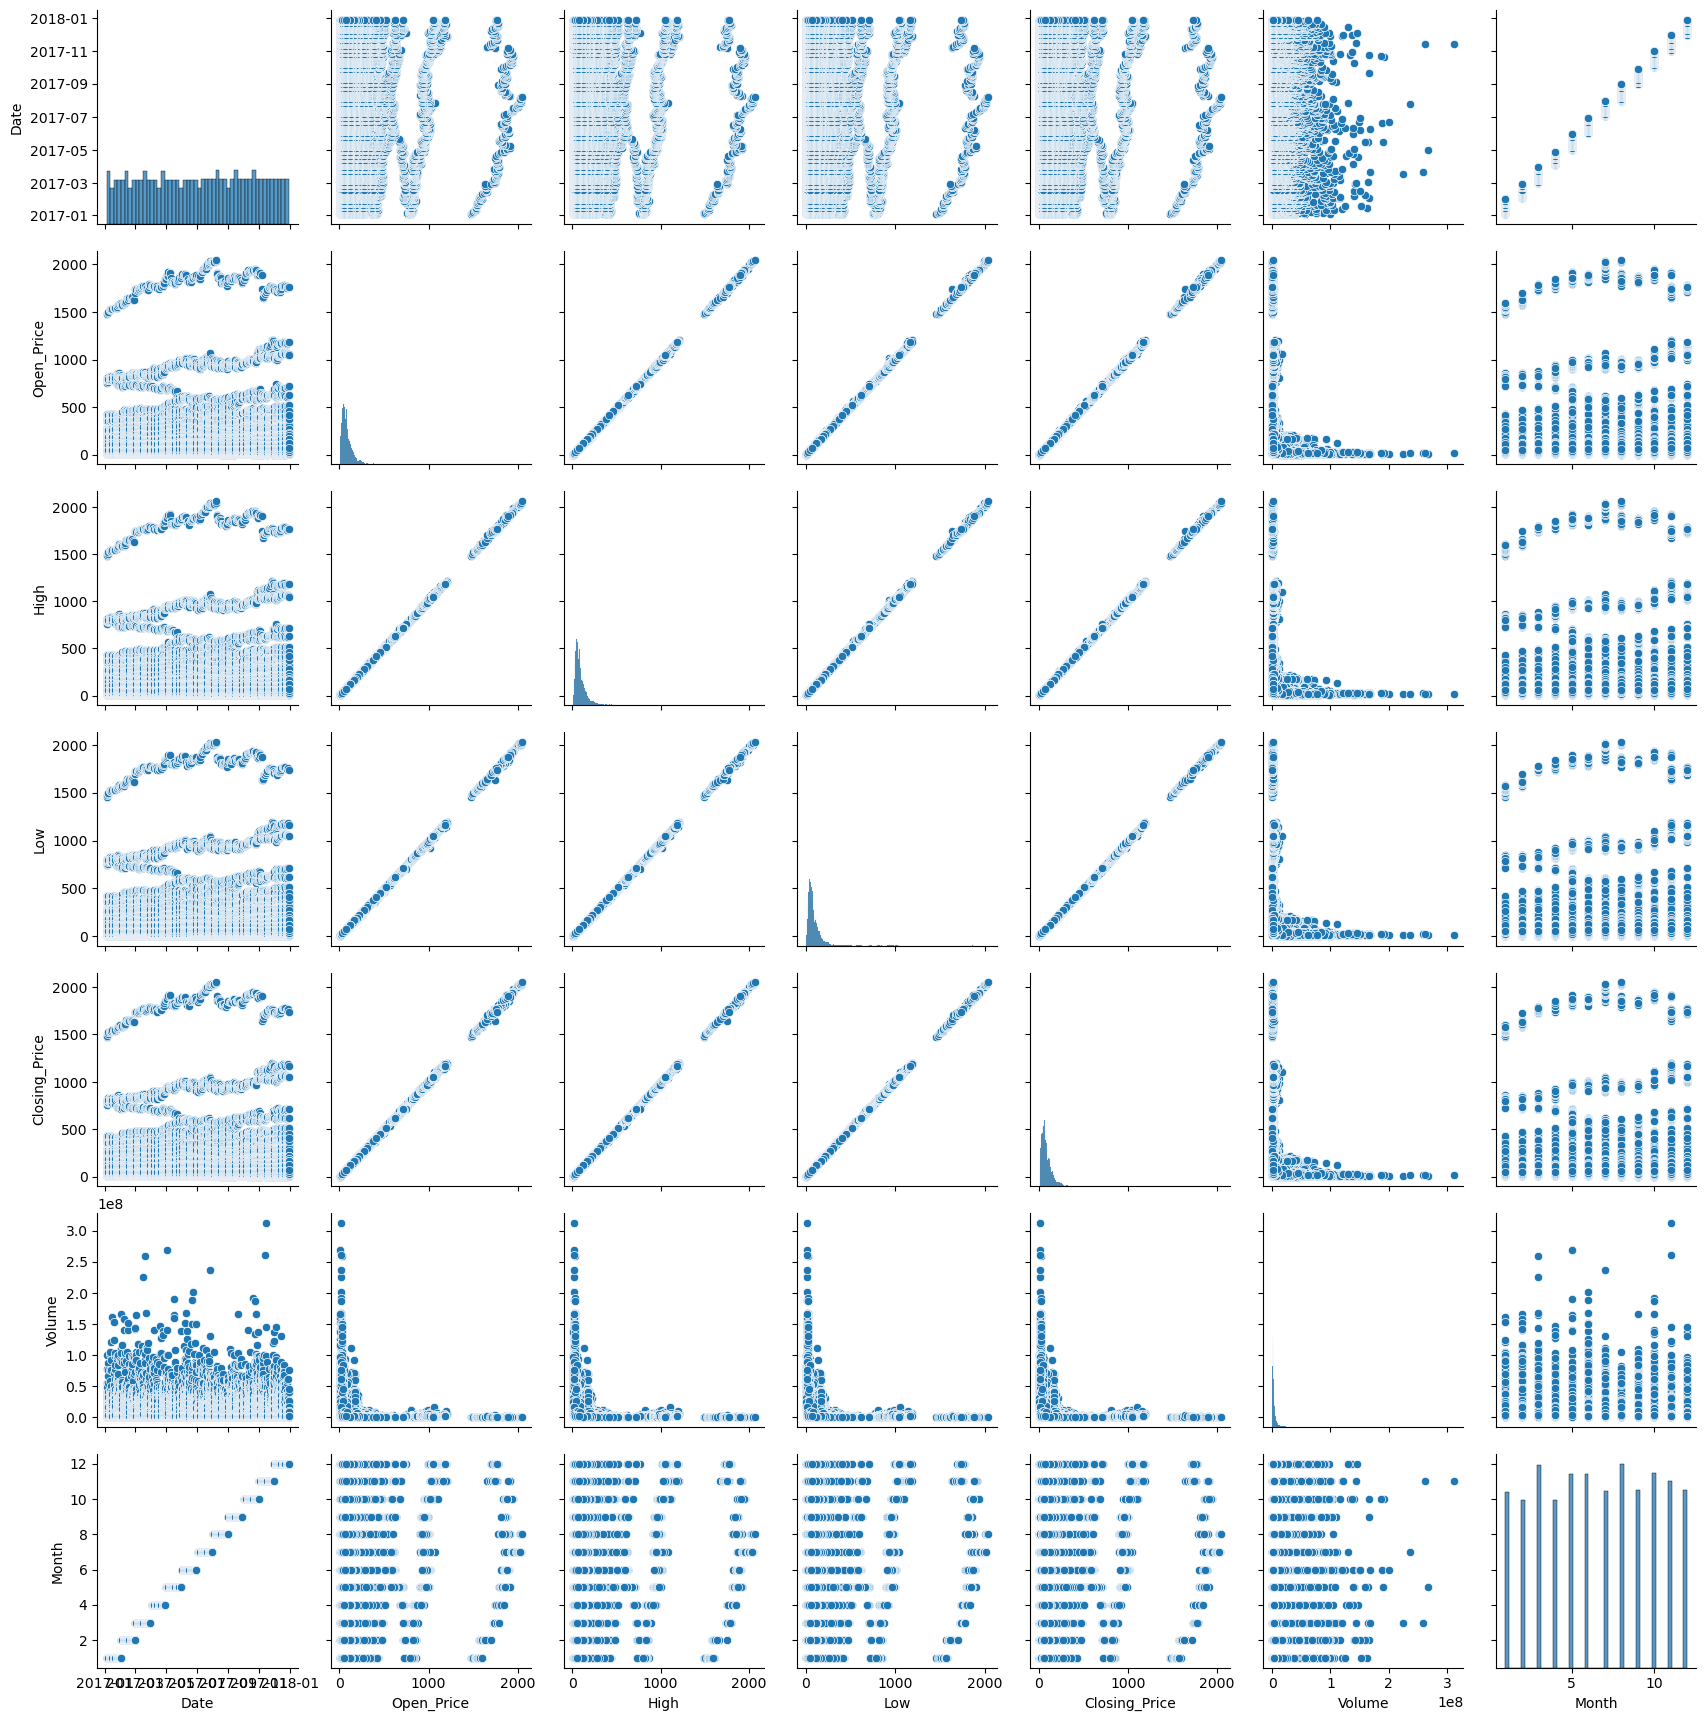

In [21]:
sns.pairplot(df,
             vars=['Date', 'Open_Price', 'High', 'Low', 'Closing_Price', 'Volume', 'Month'],)
plt.show()

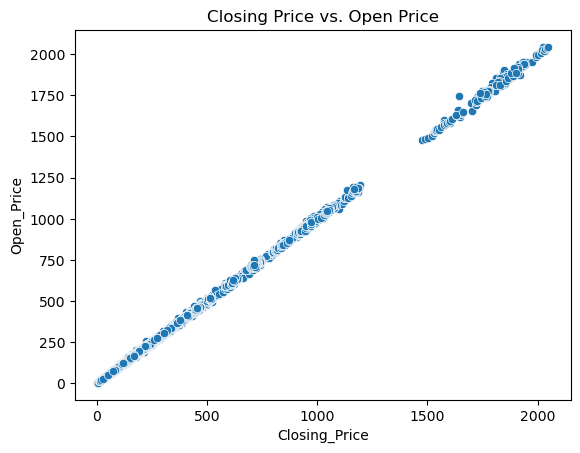

In [22]:
ax = sns.scatterplot(x='Closing_Price',
                     y='Open_Price',
                     data=df)
ax.set_title('Closing Price vs. Open Price')
plt.show()

* Example question, that can be answered with the data


Can you Show Apple Stock Price over the year?

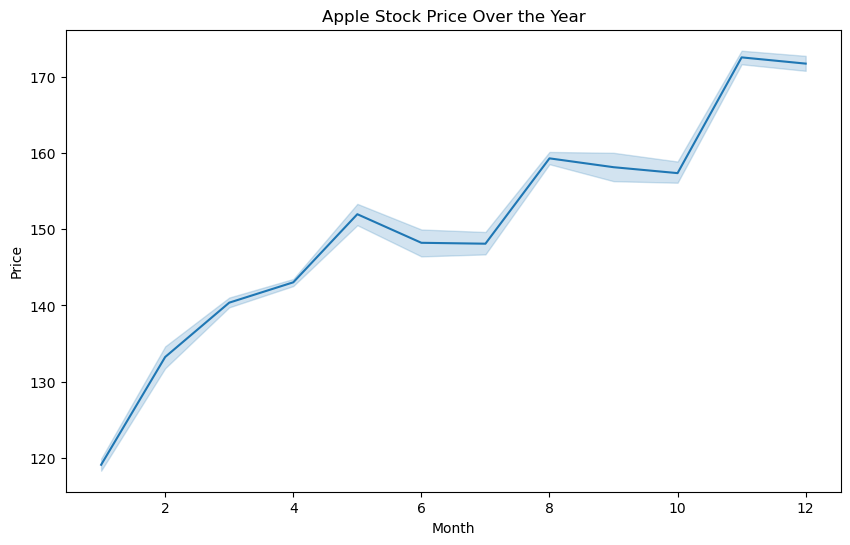

In [32]:
# Filter the data
Apple_price = df[df['Symbol'] == 'AAPL']

# Plot Apple Stock Price Over the Year
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Open_Price', data=Apple_price)
plt.title('Apple Stock Price Over the Year')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

## 5. Predictive analysis


* Specifying Prediction Target and Features

In [24]:
# Prediction target
y = df.Closing_Price

# Create the list of features 
feature_names = ['Open_Price', 'High', 'Low']

# Select data corresponding to features in feature_names
X = df[feature_names]

# Spliting the data into training and validation data, for both features and target
from sklearn.model_selection import train_test_split

# The random_state argument guarantees we get the same split every time we run this script
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

* Specifying and Fiting Model

In [25]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
#For model reproducibility, seting a numeric value for random_state when specifying the model
price_model = DecisionTreeRegressor(random_state=1)

# Fit the model with the training data
price_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [ ]:
# Checking the model accuracy on the training data
price_model.score(train_X, train_y)

0.9999999995545241

* Making Predictions

In [26]:
# Making predictions with the validation data
predictions = price_model.predict(val_X)
print(predictions)

[474.54 120.92  16.66 ... 111.38  77.47  59.67]


* Comparing predictions with the actual prices


In [27]:
# Compare the top few predictions to the actual Close price (in y)
print(val_y.head())
print(predictions)

105924    474.92
68188     120.17
113550     16.46
32623      83.06
93000      95.21
Name: Closing_Price, dtype: float64
[474.54 120.92  16.66 ... 111.38  77.47  59.67]


## 6. Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
 
# Evaluate the model
print('MSE:', mean_squared_error(val_y, predictions))
print('R-squared:', r2_score(val_y, predictions))

MSE: 1.2308869160041893
R-squared: 0.9999257020780448


## 7. Saving the Model


In [31]:
# Saving the Model using Python module called Pickle

import pickle

with open('model', 'wb') as file:
    pickle.dump(price_model, file)